In [1]:
# Supressing the Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the important liberies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# loading the data 
data =pd.read_csv(r"C:\Users\sahu\Documents\DATA SCIENCE COURSE\Project2\Healthcare-Diabetes\health_care_diabetes.csv") 
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.shape

(768, 9)

In [7]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
# replacing 0 by NaN
data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']] = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']].replace([0], np.nan)


In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
#checking the missing values
round(100*(data.isnull().sum()/len(data.index)),2)

Pregnancies                 14.45
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64

In [11]:
#dropping the columns with missing values more than 45%
data.drop(['Insulin'],axis=1,inplace=True)


In [12]:
round(100*(data.isnull().sum()/len(data.index)),2)

Pregnancies                 14.45
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64

In [13]:
# count the number of rows having > 2 missing values
len(data[data.isnull().sum(axis=1) > 2].index)

16

In [14]:
#retaining the rows having <= 2 NaNs
data = data[data.isnull().sum(axis=1) <= 2]

In [15]:
round(100*(data.isnull().sum()/len(data.index)),2)

Pregnancies                 13.43
Glucose                      0.66
BloodPressure                2.53
SkinThickness               28.06
BMI                          0.53
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64

In [16]:
# For numerical variable column we are imputing either 'Mean' or 'Median' of that column
print(data['Pregnancies'].mean())
print(data['Pregnancies'].median())
print(data['Pregnancies'].mode())
print(data['Glucose'].mean())
print(data['Glucose'].median())
print(data['Glucose'].mode())
print(data['BloodPressure'].mean())
print(data['BloodPressure'].median())
print(data['BloodPressure'].mode())
print(data['SkinThickness'].mean())
print(data['SkinThickness'].median())
print(data['SkinThickness'].mode())
print(data['BMI'].mean())
print(data['BMI'].median())
print(data['BMI'].mode())

4.490015360983103
4.0
0    1.0
dtype: float64
121.88888888888889
117.0
0    100.0
dtype: float64
72.40518417462484
72.0
0    70.0
dtype: float64
29.153419593345657
29.0
0    32.0
dtype: float64
32.432620320855605
32.150000000000006
0    32.0
dtype: float64


In [17]:
data['Pregnancies']=data['Pregnancies'].fillna(data['Pregnancies'].mean())
data['Glucose']=data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].fillna(data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].fillna(data['SkinThickness'].mean())
data['BMI']=data['BMI'].fillna(data['BMI'].mean())

In [18]:
round(100*(data.isnull().sum()/len(data.index)),2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [19]:
#checking the percentage of rows retained after data cleaning process
print(round(100*(len(data.index)/768)),"%")

98 %


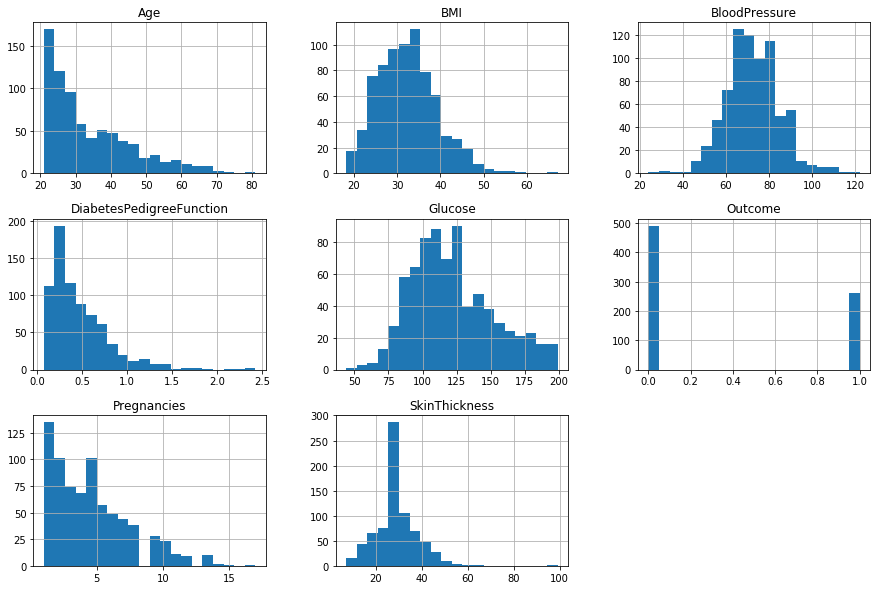

In [20]:
data.hist(bins=20, figsize=(15, 10))
plt.show()

In [21]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

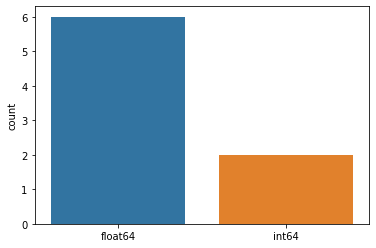

In [22]:
sns.countplot(data.dtypes.map(str))
plt.show()

## Data Exploration

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future
   course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

 

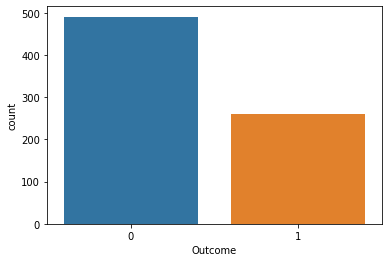

In [23]:
sns.countplot(x ='Outcome', data = data)
plt.show()

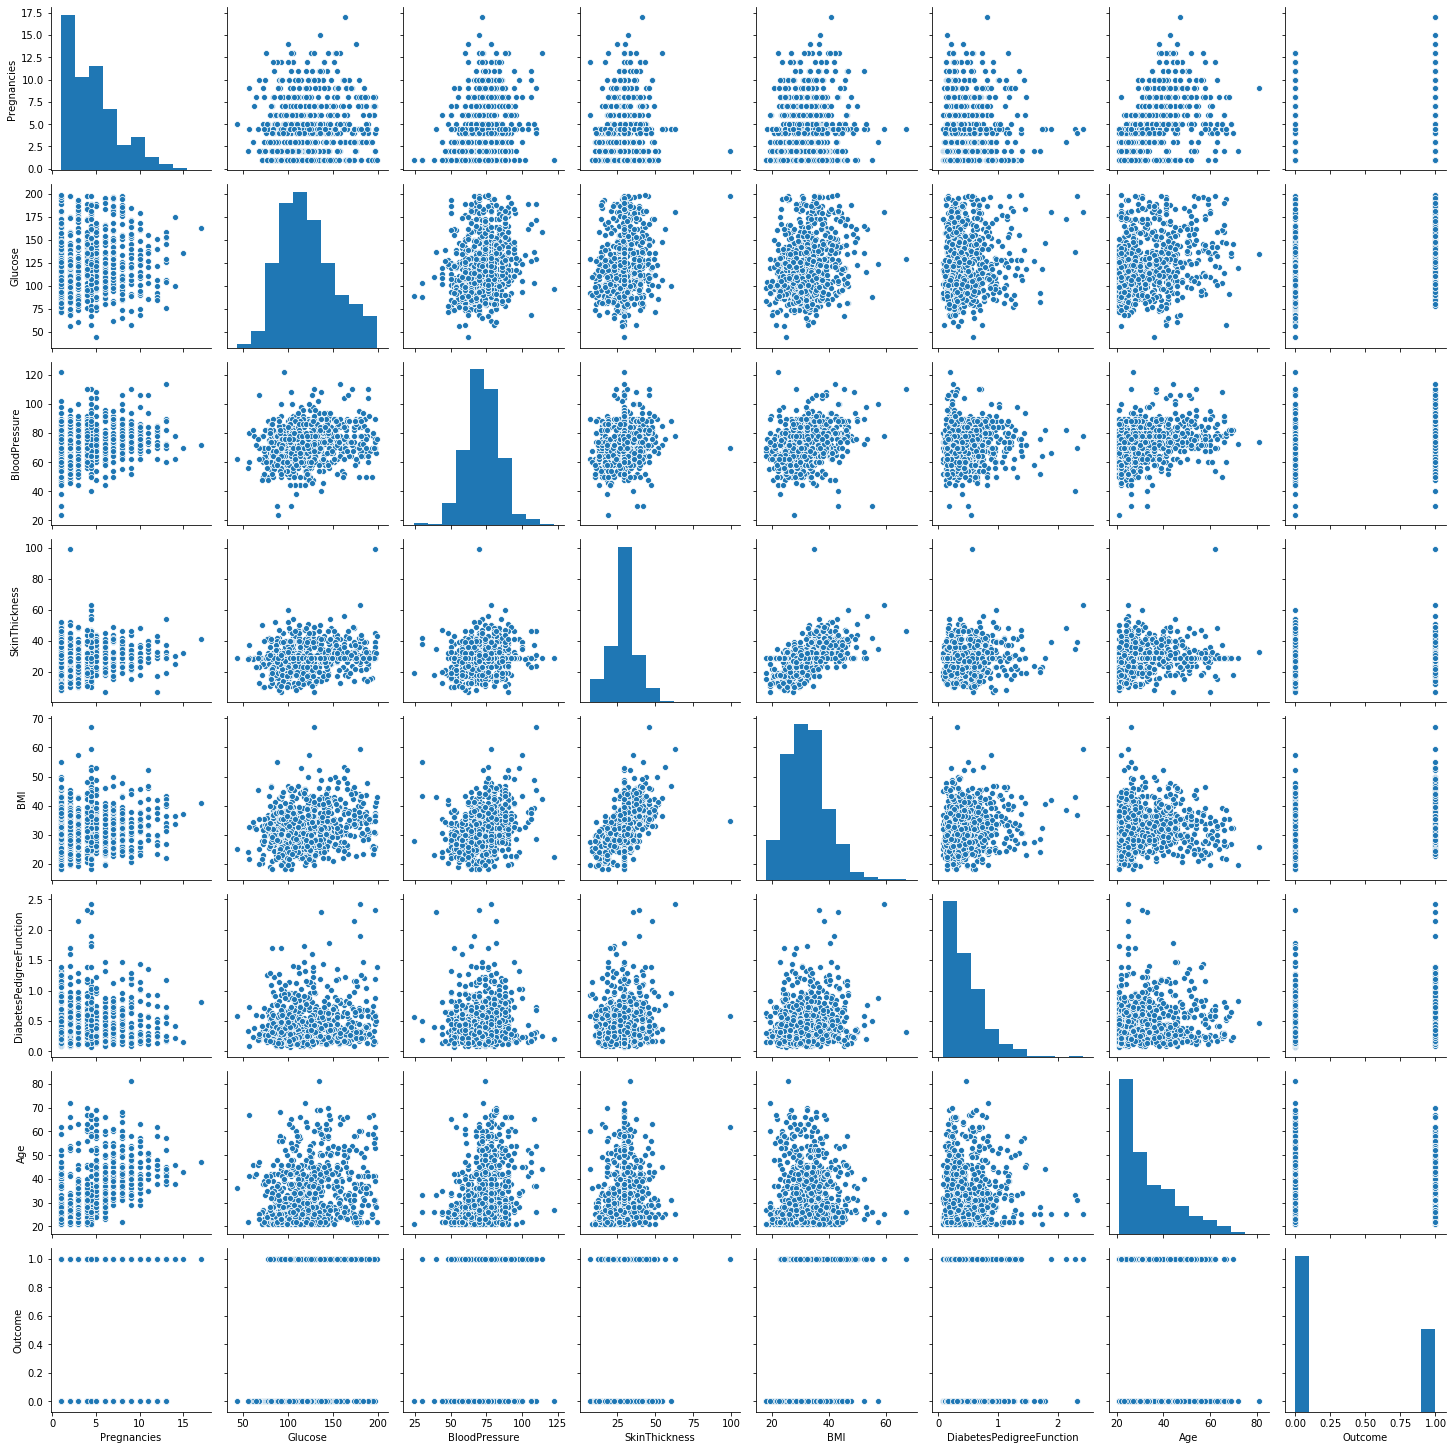

In [24]:
# pairplot
sns.pairplot(data)
plt.show()

In [25]:
cor = data.corr()
round(cor, 3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.154,0.260,0.132,0.112,-0.005,0.516,0.248
Glucose,0.154,1.000,0.220,0.195,0.226,0.129,0.263,0.489
BloodPressure,0.260,0.220,1.000,0.193,0.283,-0.003,0.326,0.168
SkinThickness,0.132,0.195,0.193,1.000,0.547,0.102,0.129,0.218
BMI,0.112,0.226,0.283,0.547,1.000,0.154,0.026,0.306
DiabetesPedigreeFunction,-0.005,0.129,-0.003,0.102,0.154,1.000,0.026,0.173
Age,0.516,0.263,0.326,0.129,0.026,0.026,1.000,0.243
Outcome,0.248,0.489,0.168,0.218,0.306,0.173,0.243,1.000


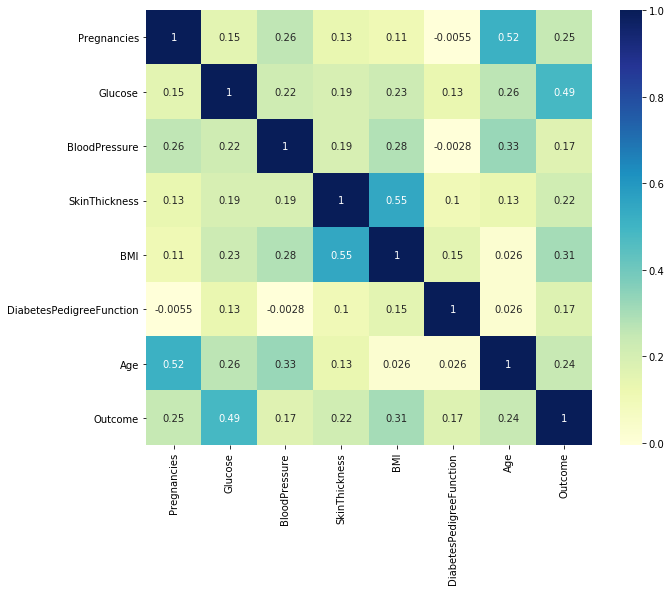

In [26]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Project Task: Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.


In [27]:
data['Outcome'].value_counts()

0    491
1    261
Name: Outcome, dtype: int64

In [28]:
#split our X & y

X = data.drop('Outcome', axis=1)
y = data['Outcome']
print(X.shape)
print(y.shape)

(752, 7)
(752,)


In [29]:
#split our dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state =21)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(526, 7)
(226, 7)
(526,)
(226,)


In [74]:
train=data.sample(frac=0.7,random_state=200) #random state is a seed value
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
309,2.000000,124.0,68.0,28.00000,32.9,0.875,30,1
473,7.000000,136.0,90.0,29.15342,29.9,0.210,50,0
31,3.000000,158.0,76.0,36.00000,31.6,0.851,28,1
404,5.000000,168.0,64.0,29.15342,32.9,0.135,41,1
385,1.000000,119.0,54.0,13.00000,22.3,0.205,24,0
...,...,...,...,...,...,...,...,...
520,2.000000,68.0,70.0,32.00000,25.0,0.187,25,0
766,1.000000,126.0,60.0,29.15342,30.1,0.349,47,1
396,3.000000,96.0,56.0,34.00000,24.7,0.944,39,0
98,6.000000,93.0,50.0,30.00000,28.7,0.356,23,0


In [75]:
#save the data
train.to_excel('healthcare-train.xlsx',index=False)


## LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_test_pred=logReg.predict(X_test)

In [33]:
from sklearn import metrics
print('ACCURACY SCORE FOR TEST DATA:')
print(metrics.accuracy_score(y_test,y_test_pred))

ACCURACY SCORE FOR TEST DATA:
0.7920353982300885


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_lr = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(result_lr)
result1_lr = classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1_lr)
result2_lr = accuracy_score(y_test,y_test_pred)
print("Accuracy:",result2_lr)

TP = result_lr[1, 1]
TN = result_lr[0, 0]
FP = result_lr[0, 1]
FN = result_lr[1, 0]

#sensitivity = metrics.recall_score(y_test, y_pred_SVM)
sensitivity = TP / float(FN + TP)
print("\nSensitivity/Recall/TPR:",sensitivity)

# calculate the specificity
specificity = (TN / (TN + FP))
print("\nSpecificity:",specificity)

# calculate precision
precision = (TP / (TP + FP))
print("\nPrecision:",precision)

# calculate f_1 score
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))
print("\nf1-score:",f1_score)

#Calculate FPR
FPR=1-specificity
print("\nFPR:",FPR)

Confusion Matrix:
[[121  13]
 [ 34  58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       134
           1       0.82      0.63      0.71        92

    accuracy                           0.79       226
   macro avg       0.80      0.77      0.77       226
weighted avg       0.80      0.79      0.79       226

Accuracy: 0.7920353982300885

Sensitivity/Recall/TPR: 0.6304347826086957

Specificity: 0.9029850746268657

Precision: 0.8169014084507042

f1-score: 0.7116564417177915

FPR: 0.09701492537313428


## KNN 

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn_model= KNeighborsClassifier(n_neighbors = 3)

In [37]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [38]:
y_test_knn=knn_model.predict(X_test)

In [39]:
print('ACCURACY SCORE OF KNN ON TEST DATA:')
print(metrics.accuracy_score(y_test,y_test_knn))

ACCURACY SCORE OF KNN ON TEST DATA:
0.7168141592920354


In [40]:
#checking how is the data modelled using train dataset
y_train_knn=knn_model.predict(X_train)

In [41]:
print('ACCURACY SCORE OF KNN ON Train DATA:')
print(metrics.accuracy_score(y_train,y_train_knn))

ACCURACY SCORE OF KNN ON Train DATA:
0.8479087452471483


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_knn = confusion_matrix(y_test, y_test_knn)
print("Confusion Matrix:")
print(result_knn)
result1_knn = classification_report(y_test, y_test_knn)
print("Classification Report:",)
print (result1_knn)
result2_knn = accuracy_score(y_test,y_test_knn)
print("Accuracy:",result2_knn)

TP = result_knn[1, 1]
TN = result_knn[0, 0]
FP = result_knn[0, 1]
FN = result_knn[1, 0]

#sensitivity = metrics.recall_score(y_test, y_pred_SVM)
sensitivity = TP / float(FN + TP)
print("\nSensitivity/Recall/TPR:",sensitivity)

# calculate the specificity
specificity = (TN / (TN + FP))
print("\nSpecificity:",specificity)

# calculate precision
precision = (TP / (TP + FP))
print("\nPrecision:",precision)

# calculate f_1 score
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))
print("\nf1-score:",f1_score)

#Calculate FPR
FPR=1-specificity
print("\nFPR:",FPR)

Confusion Matrix:
[[105  29]
 [ 35  57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       134
           1       0.66      0.62      0.64        92

    accuracy                           0.72       226
   macro avg       0.71      0.70      0.70       226
weighted avg       0.71      0.72      0.72       226

Accuracy: 0.7168141592920354

Sensitivity/Recall/TPR: 0.6195652173913043

Specificity: 0.7835820895522388

Precision: 0.6627906976744186

f1-score: 0.6404494382022472

FPR: 0.21641791044776115


## naive bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()

In [44]:
gnb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
y_pred_train=gnb_model.predict(X_train)
y_pred_test=gnb_model.predict(X_test)

In [46]:
print('ACCURACY SCORE OF NAIVE BAYES ON TEST DATA:')
print(metrics.accuracy_score(y_test,y_pred_test))

ACCURACY SCORE OF NAIVE BAYES ON TEST DATA:
0.7787610619469026


In [47]:
print('ACCURACY SCORE OF NAIVE BAYES ON Train DATA:')
print(metrics.accuracy_score(y_train,y_pred_train))

ACCURACY SCORE OF NAIVE BAYES ON Train DATA:
0.7433460076045627


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_NB = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(result_NB)
result_NB1 = classification_report(y_test, y_pred_test)
print("Classification Report:",)
print (result_NB1)
result_NB2 = accuracy_score(y_test,y_pred_test)
print("Accuracy:",result_NB2)

TP = result_NB[1, 1]
TN = result_NB[0, 0]
FP = result_NB[0, 1]
FN = result_NB[1, 0]

#sensitivity = metrics.recall_score(y_test, y_pred_SVM)
sensitivity = TP / float(FN + TP)
print("\nSensitivity/Recall/TPR:",sensitivity)

# calculate the specificity
specificity = (TN / (TN + FP))
print("\nSpecificity:",specificity)

# calculate precision
precision = (TP / (TP + FP))
print("\nPrecision:",precision)

# calculate f_1 score
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))
print("\nf1-score:",f1_score)

#Calculate FPR
FPR=1-specificity
print("\nFPR:",FPR)

Confusion Matrix:
[[114  20]
 [ 30  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       134
           1       0.76      0.67      0.71        92

    accuracy                           0.78       226
   macro avg       0.77      0.76      0.77       226
weighted avg       0.78      0.78      0.78       226

Accuracy: 0.7787610619469026

Sensitivity/Recall/TPR: 0.6739130434782609

Specificity: 0.8507462686567164

Precision: 0.7560975609756098

f1-score: 0.7126436781609194

FPR: 0.14925373134328357


## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier() #instantiating the estimator object 
dt_model.fit(X_train,y_train)
y_predict = dt_model.predict(X_test)

### Evaluating a classification model


In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_predict,y_test)
print("The Prediction accuracy of the Decision Tree model on testing data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on testing data is:  0.6814159292035398


In [51]:
y_pred_train = dt_model.predict(X_train)
accuracy = accuracy_score(y_pred_train,y_train)
print("The Prediction accuracy of the Decision Tree model on training data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on training data is:  1.0


### Prune our decision tree to avoid overfitting

In [52]:
dt_prune = DecisionTreeClassifier(max_depth=4) #instantiating the estimator object 
dt_prune.fit(X_train,y_train)
y_predict_DT = dt_prune.predict(X_test)

In [53]:
accuracy = accuracy_score(y_predict,y_test)
print("The Prediction accuracy of the Decision Tree model on testing data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on testing data is:  0.6814159292035398


In [54]:
y_pred_train = dt_prune.predict(X_train)
accuracy = accuracy_score(y_pred_train,y_train)
print("The Prediction accuracy of the Decision Tree model on training data is: " , accuracy)

The Prediction accuracy of the Decision Tree model on training data is:  0.8155893536121673


In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_DT = confusion_matrix(y_test, y_predict_DT)
print("Confusion Matrix:")
print(result_DT)
res_DT1 = classification_report(y_test, y_predict_DT)
print("Classification Report:",)
print (res_DT1)
res_DT2 = accuracy_score(y_test,y_predict_DT)
print("Accuracy:",res_DT2)

TP = result_DT[1, 1]
TN = result_DT[0, 0]
FP = result_DT[0, 1]
FN = result_DT[1, 0]

#sensitivity = metrics.recall_score(y_test, y_pred_SVM)
sensitivity = TP / float(FN + TP)
print("\nSensitivity/Recall/TPR:",sensitivity)

# calculate the specificity
specificity = (TN / (TN + FP))
print("\nSpecificity:",specificity)

# calculate precision
precision = (TP / (TP + FP))
print("\nPrecision:",precision)

# calculate f_1 score
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))
print("\nf1-score:",f1_score)

#Calculate FPR
FPR=1-specificity
print("\nFPR:",FPR)

Confusion Matrix:
[[119  15]
 [ 41  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       134
           1       0.77      0.55      0.65        92

    accuracy                           0.75       226
   macro avg       0.76      0.72      0.73       226
weighted avg       0.76      0.75      0.74       226

Accuracy: 0.7522123893805309

Sensitivity/Recall/TPR: 0.5543478260869565

Specificity: 0.8880597014925373

Precision: 0.7727272727272727

f1-score: 0.6455696202531646

FPR: 0.11194029850746268


## SVM

In [56]:
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 
svc_model_linear.fit(X_train,y_train)
svc_pred=svc_model_linear.predict(X_test)

In [57]:
svc_model_linear.score(X_train,y_train)

0.7642585551330798

In [58]:
svc_model_linear.score(X_test,y_test)

0.7920353982300885

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_svm = confusion_matrix(y_test, svc_pred)
print("Confusion Matrix:")
print(result_svm)
res1 = classification_report(y_test, svc_pred)
print("Classification Report:",)
print (res1)
res2 = accuracy_score(y_test,svc_pred)
print("Accuracy:",res2)

TP = result_svm[1, 1]
TN = result_svm[0, 0]
FP = result_svm[0, 1]
FN = result_svm[1, 0]

#sensitivity = metrics.recall_score(y_test, y_pred_SVM)
sensitivity = TP / float(FN + TP)
print("\nSensitivity/Recall/TPR:",sensitivity)

# calculate the specificity
specificity = (TN / (TN + FP))
print("\nSpecificity:",specificity)

# calculate precision
precision = (TP / (TP + FP))
print("\nPrecision:",precision)

# calculate f_1 score
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))
print("\nf1-score:",f1_score)

#Calculate FPR
FPR=1-specificity
print("\nFPR:",FPR)

Confusion Matrix:
[[124  10]
 [ 37  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       134
           1       0.85      0.60      0.70        92

    accuracy                           0.79       226
   macro avg       0.81      0.76      0.77       226
weighted avg       0.80      0.79      0.78       226

Accuracy: 0.7920353982300885

Sensitivity/Recall/TPR: 0.5978260869565217

Specificity: 0.9253731343283582

Precision: 0.8461538461538461

f1-score: 0.7006369426751592

FPR: 0.07462686567164178


In [60]:
from sklearn.svm import SVC
svc_model_rbf = SVC(kernel='rbf',random_state=0,probability=True,C=1) 
svc_model_rbf.fit(X_train,y_train)
svc_pred_rbf=svc_model_rbf.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_svm = confusion_matrix(y_test, svc_pred_rbf)
print("Confusion Matrix:")
print(result_svm)
res1 = classification_report(y_test, svc_pred_rbf)
print("Classification Report:",)
print (res1)
res2 = accuracy_score(y_test,svc_pred_rbf)
print("Accuracy:",res2)

TP = result_svm[1, 1]
TN = result_svm[0, 0]
FP = result_svm[0, 1]
FN = result_svm[1, 0]

#sensitivity = metrics.recall_score(y_test, y_pred_SVM)
sensitivity = TP / float(FN + TP)
print("\nSensitivity/Recall/TPR:",sensitivity)

# calculate the specificity
specificity = (TN / (TN + FP))
print("\nSpecificity:",specificity)

# calculate precision
precision = (TP / (TP + FP))
print("\nPrecision:",precision)

# calculate f_1 score
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))
print("\nf1-score:",f1_score)

#Calculate FPR
FPR=1-specificity
print("\nFPR:",FPR)

Confusion Matrix:
[[124  10]
 [ 45  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       134
           1       0.82      0.51      0.63        92

    accuracy                           0.76       226
   macro avg       0.78      0.72      0.72       226
weighted avg       0.77      0.76      0.74       226

Accuracy: 0.7566371681415929

Sensitivity/Recall/TPR: 0.5108695652173914

Specificity: 0.9253731343283582

Precision: 0.8245614035087719

f1-score: 0.6308724832214765

FPR: 0.07462686567164178


## RANDOM FOREST CLASSIFIER

In [62]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=11)
model_RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=11,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
model_RFC.score(X_train,y_train)

0.9904942965779467

In [64]:
model_RFC.score(X_test,y_test)

0.7345132743362832

In [65]:
y_pred = model_RFC.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

TP = result[1, 1]
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

#sensitivity = TP / float(FN + TP)
sensitivity = metrics.recall_score(y_test, y_pred)
print("\nSensitivity/Recall/TPR:",sensitivity)

# calculate the specificity
specificity = (TN / (TN + FP))
print("\nSpecificity:",specificity)

# calculate precision
precision = (TP / (TP + FP))
print("\nPrecision:",precision)

# calculate f_1 score
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))
print("\nf1-score:",f1_score)

#Calculate FPR
FPR=1-specificity
print("\nFPR:",FPR)

Confusion Matrix:
[[112  22]
 [ 38  54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       134
           1       0.71      0.59      0.64        92

    accuracy                           0.73       226
   macro avg       0.73      0.71      0.72       226
weighted avg       0.73      0.73      0.73       226

Accuracy: 0.7345132743362832

Sensitivity/Recall/TPR: 0.5869565217391305

Specificity: 0.835820895522388

Precision: 0.7105263157894737

f1-score: 0.6428571428571428

FPR: 0.16417910447761197


## AUC (ROC curve)

In [67]:
# predict probabilities
pred_prob1 = logReg.predict_proba(X_test)
pred_prob2 = knn_model.predict_proba(X_test)
pred_prob3 = gnb_model.predict_proba(X_test)
pred_prob4 = dt_model.predict_proba(X_test)
pred_prob5 = svc_model_linear.predict_proba(X_test)
pred_prob6 = model_RFC.predict_proba(X_test)

In [68]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [69]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score_logistic_regression = roc_auc_score(y_test, pred_prob1[:,1])
auc_score_KNN = roc_auc_score(y_test, pred_prob2[:,1])
auc_score_NaiveBayes = roc_auc_score(y_test, pred_prob3[:,1])
auc_score_DecisionTree = roc_auc_score(y_test, pred_prob4[:,1])
auc_score_SVC = roc_auc_score(y_test, pred_prob5[:,1])
auc_score_RandomForest = roc_auc_score(y_test, pred_prob6[:,1])


lg=print('auc of Logistic Regression:',100*round(auc_score_logistic_regression,4),'%')
knn=print('auc of KNN:',100*round(auc_score_KNN,4),'%')
nb=print('auc of Gaussian Naive Bayes:',100*round(auc_score_NaiveBayes,4),'%')
dt=print('auc of Decision Tree:',100*round(auc_score_DecisionTree,4),'%')
svc=print('auc of SVC:',100*round(auc_score_SVC,4),'%')
rfc=print('auc of Random Forest Classifier:',100*round(auc_score_RandomForest,4),'%')

auc of Logistic Regression: 85.42 %
auc of KNN: 74.95 %
auc of Gaussian Naive Bayes: 83.53 %
auc of Decision Tree: 65.81 %
auc of SVC: 85.39999999999999 %
auc of Random Forest Classifier: 80.02 %


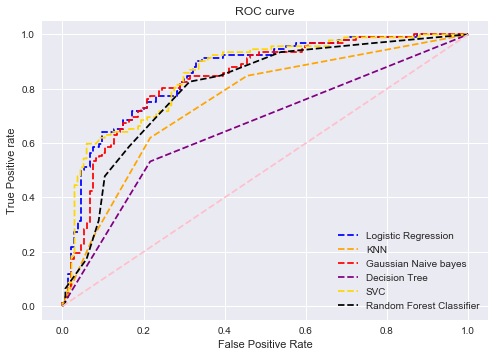

In [70]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gaussian Naive bayes')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='gold', label='SVC')
plt.plot(fpr6, tpr6, linestyle='--',color='black', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();